In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import itertools


In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Mounted at /content/drive


Cargamos los dataset de cada receta para implementar el modelo

In [ ]:
!gdown https://drive.google.com/file/d/1tH9oqyL2KtNerYWH8012raDla7iko7jL/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tH9oqyL2KtNerYWH8012raDla7iko7jL
To: /content/df_A_modelo_encode.csv
100% 49.6M/49.6M [00:00<00:00, 75.4MB/s]


In [ ]:
file_name1 = 'df_A_modelo_encode.csv'
df_A_rf = pd.read_csv(file_name1)

In [ ]:
!gdown https://drive.google.com/file/d/1BgEwnFrLOQNpqTkik12pvzWizLiWTOeH/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1BgEwnFrLOQNpqTkik12pvzWizLiWTOeH
To: /content/df_B_modelo_encode.csv
100% 51.1M/51.1M [00:01<00:00, 45.4MB/s]


In [ ]:
file_name2 = 'df_B_modelo_encode.csv'
df_B_rf = pd.read_csv(file_name2)

In [ ]:
!gdown https://drive.google.com/file/d/1tI7pc0yVTkHK5sBuK4M0CEyEoPoj-ATS/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tI7pc0yVTkHK5sBuK4M0CEyEoPoj-ATS
To: /content/df_C_modelo_encode.csv
100% 61.7M/61.7M [00:00<00:00, 191MB/s]


In [ ]:
file_name3 = 'df_C_modelo_encode.csv'
df_C_rf = pd.read_csv(file_name3)

In [ ]:
!gdown https://drive.google.com/file/d/18E6orTGLwBPyPuoJIJIAv_WXFIIfsliX/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=18E6orTGLwBPyPuoJIJIAv_WXFIIfsliX
To: /content/df_D_modelo_encode.csv
100% 61.0M/61.0M [00:00<00:00, 82.1MB/s]


In [ ]:
file_name4 = 'df_D_modelo_encode.csv'
df_D_rf = pd.read_csv(file_name4)

Librerias necesarias para el modelo

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


%matplotlib notebook
%matplotlib inline

In [ ]:
df_A_rf.describe()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano
count,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,1.700900e+05,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000,170090.000000
mean,0.364385,1.051277,1.045381,0.191310,0.994003,0.053580,0.125309,0.269195,0.241356,0.416255,1.885898e+04,0.692545,2019.393245,6.559433,0.209413,0.239567,0.273808,0.277212
std,0.128667,0.231609,0.215483,0.049479,0.112413,0.081421,0.033215,0.042451,0.040652,1.476307,6.864772e+04,0.461441,1.397456,3.620712,0.406891,0.426821,0.445913,0.447623
min,-0.009102,0.254644,0.308995,0.034613,0.638591,-0.206024,0.042400,0.119800,0.107700,0.000000,4.225951e+02,0.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258850,0.877130,0.882758,0.161540,0.913383,-0.008449,0.100000,0.236300,0.212500,0.000000,2.929467e+03,0.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351721,1.044740,1.045812,0.194309,0.975294,0.043326,0.123250,0.269200,0.239700,0.000000,6.336731e+03,1.000000,2019.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.465916,1.200434,1.194116,0.223182,1.064357,0.110543,0.148100,0.300400,0.269400,0.000000,3.136548e+04,1.000000,2021.000000,10.000000,0.000000,0.000000,1.000000,1.000000
max,0.747038,1.770667,1.744506,0.328613,1.400520,0.325748,0.248600,0.403100,0.373200,9.826493,1.370630e+06,1.000000,2022.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_A_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170090 entries, 0 to 170089
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ndvi_median         170090 non-null  float64
 1   mNDVI_median        170090 non-null  float64
 2   gari_median         170090 non-null  float64
 3   tcariOsavi_median   170090 non-null  float64
 4   sipi_median         170090 non-null  float64
 5   ndii_median         170090 non-null  float64
 6   B04_median          170090 non-null  float64
 7   B08_median          170090 non-null  float64
 8   B11_median          170090 non-null  float64
 9   raster              170090 non-null  object 
 10  clouds_on_raster    170090 non-null  float64
 11  area_m2             170090 non-null  float64
 12  date                170090 non-null  object 
 13  target              170090 non-null  int64  
 14  año                 170090 non-null  int64  
 15  mes                 170090 non-nul

In [ ]:
df_B_rf.describe()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano
count,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,1.750070e+05,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000,175007.000000
mean,0.363666,1.053057,1.046904,0.190664,0.993507,0.053517,0.125467,0.269052,0.241278,0.443781,1.881031e+04,0.691389,2019.405978,6.580097,0.213769,0.238505,0.274663,0.273063
std,0.128009,0.233666,0.216699,0.050191,0.112388,0.081156,0.033266,0.042491,0.040770,1.534604,6.830559e+04,0.461921,1.392611,3.610216,0.409967,0.426170,0.446346,0.445534
min,-0.009102,0.234709,0.308995,0.019951,0.625000,-0.185634,0.042400,0.116200,0.107700,0.000000,4.225951e+02,0.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259406,0.879246,0.884892,0.161708,0.913881,-0.007830,0.100300,0.236400,0.212700,0.000000,2.929467e+03,0.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.352282,1.046662,1.047842,0.194424,0.974899,0.043867,0.123000,0.269300,0.239300,0.000000,6.336731e+03,1.000000,2019.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.463583,1.198785,1.192772,0.222526,1.062989,0.109303,0.148400,0.299850,0.268900,0.000000,3.136548e+04,1.000000,2021.000000,10.000000,0.000000,0.000000,1.000000,1.000000
max,0.747038,1.811232,1.781766,0.330740,1.394037,0.327150,0.258200,0.413900,0.382500,9.826493,1.370630e+06,1.000000,2022.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_B_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175007 entries, 0 to 175006
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ndvi_median         175007 non-null  float64
 1   mNDVI_median        175007 non-null  float64
 2   gari_median         175007 non-null  float64
 3   tcariOsavi_median   175007 non-null  float64
 4   sipi_median         175007 non-null  float64
 5   ndii_median         175007 non-null  float64
 6   B04_median          175007 non-null  float64
 7   B08_median          175007 non-null  float64
 8   B11_median          175007 non-null  float64
 9   raster              175007 non-null  object 
 10  clouds_on_raster    175007 non-null  float64
 11  area_m2             175007 non-null  float64
 12  date                175007 non-null  object 
 13  target              175007 non-null  int64  
 14  año                 175007 non-null  int64  
 15  mes                 175007 non-nul

In [ ]:
df_C_rf.describe()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano
count,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,2.099750e+05,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000
mean,0.360393,1.056179,1.048979,0.186304,0.995806,0.055157,0.127558,0.271164,0.242459,3.906942,1.868400e+04,0.697412,2019.470213,6.445096,0.221245,0.233175,0.267460,0.278119
std,0.129677,0.249764,0.229699,0.053963,0.125364,0.082092,0.034765,0.042764,0.041735,8.843725,6.888406e+04,0.459380,1.407488,3.600756,0.415086,0.422854,0.442636,0.448073
min,-0.009102,-0.038760,0.299199,-0.048641,0.474378,-0.146854,0.042400,0.136800,0.093400,0.000000,4.225951e+02,0.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250544,0.878140,0.888130,0.159433,0.911408,-0.008313,0.102100,0.238300,0.213100,0.000000,2.928527e+03,0.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.349143,1.046311,1.047573,0.192141,0.974401,0.046276,0.125800,0.271500,0.240900,0.000000,6.128520e+03,1.000000,2020.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.463446,1.205720,1.199225,0.218981,1.064299,0.113271,0.150400,0.301800,0.270200,0.533689,3.136548e+04,1.000000,2021.000000,10.000000,0.000000,0.000000,1.000000,1.000000
max,0.762083,2.071175,1.973077,0.369972,1.656963,0.330231,0.287400,0.404600,0.395550,37.477434,1.370630e+06,1.000000,2022.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_C_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209975 entries, 0 to 209974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ndvi_median         209975 non-null  float64
 1   mNDVI_median        209975 non-null  float64
 2   gari_median         209975 non-null  float64
 3   tcariOsavi_median   209975 non-null  float64
 4   sipi_median         209975 non-null  float64
 5   ndii_median         209975 non-null  float64
 6   B04_median          209975 non-null  float64
 7   B08_median          209975 non-null  float64
 8   B11_median          209975 non-null  float64
 9   raster              209975 non-null  object 
 10  clouds_on_raster    209975 non-null  float64
 11  area_m2             209975 non-null  float64
 12  date                209975 non-null  object 
 13  target              209975 non-null  int64  
 14  año                 209975 non-null  int64  
 15  mes                 209975 non-nul

In [ ]:
df_D_rf.describe()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano
count,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,2.099750e+05,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000,209975.000000
mean,0.065475,0.051695,0.024733,-0.028560,0.085783,0.046964,0.004219,-0.007655,-0.002683,3.906942,1.868400e+04,0.697412,2019.470213,6.445096,0.221245,0.233175,0.267460,0.278119
std,0.724173,0.774762,0.753107,0.838992,0.784420,0.793250,0.744961,0.766811,0.754307,8.843725,6.888406e+04,0.459380,1.407488,3.600756,0.415086,0.422854,0.442636,0.448073
min,-2.653122,-2.601384,-2.595154,-2.774369,-2.704100,-2.731226,-2.679892,-2.707441,-2.790905,0.000000,4.225951e+02,0.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.453150,-0.475215,-0.487141,-0.509989,-0.455283,-0.470958,-0.522829,-0.516650,-0.512090,0.000000,2.928527e+03,0.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.128520e+03,1.000000,2020.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.532518,0.514881,0.503570,0.488989,0.540894,0.519406,0.477184,0.483968,0.489689,0.533689,3.136548e+04,1.000000,2021.000000,10.000000,0.000000,0.000000,1.000000,1.000000
max,2.583387,2.698531,2.717551,2.438409,2.677993,3.062737,2.850592,2.720931,2.752699,37.477434,1.370630e+06,1.000000,2022.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_D_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209975 entries, 0 to 209974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ndvi_median         209975 non-null  float64
 1   mNDVI_median        209975 non-null  float64
 2   gari_median         209975 non-null  float64
 3   tcariOsavi_median   209975 non-null  float64
 4   sipi_median         209975 non-null  float64
 5   ndii_median         209975 non-null  float64
 6   B04_median          209975 non-null  float64
 7   B08_median          209975 non-null  float64
 8   B11_median          209975 non-null  float64
 9   raster              209975 non-null  object 
 10  clouds_on_raster    209975 non-null  float64
 11  area_m2             209975 non-null  float64
 12  date                209975 non-null  object 
 13  target              209975 non-null  int64  
 14  año                 209975 non-null  int64  
 15  mes                 209975 non-nul

##Preparación de los dataset para modelos basados en datos temporales.



Convertimos los datos de la variable date a tipo fecha y agregamos una columna adicional en cada dataset basada en el número de la semana del año. La columna 'week' toma 53 valores distintos.

x.strftime('%U'): Número de semana del año (domingo como primer día de la semana). Todos los días de un nuevo año que preceden al primer domingo se consideran en la semana 0.

In [ ]:
def prc_dates(df,col='date',drop_col=True):

  df[col]=pd.to_datetime(df[col])
  # df['month']=df[col].apply(lambda x: x.month)
  # df['year']=df[col].apply(lambda x: x.year)
  df['week']=df[col].apply(lambda x:float(x.strftime('%U')))
  if drop_col:
    df.drop(col,axis=1,inplace=True)
  return df

In [ ]:
df_A=prc_dates(df_A_rf.copy())
df_A.head()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,raster,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano,week
0,0.547001,1.301351,1.285897,0.212710,0.884216,0.166902,0.0779,0.2645,0.18770,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4650.710032,1,2017,1,0,0,0,1,1.0
1,0.534292,1.059602,1.061493,0.240232,0.971875,0.145259,0.0988,0.3329,0.25420,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1502.000513,1,2017,1,0,0,0,1,1.0
2,0.525454,1.057045,1.058720,0.203292,0.973017,0.158971,0.1062,0.3415,0.24640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2004.192528,1,2017,1,0,0,0,1,1.0
3,0.593190,1.072501,1.073903,0.211842,0.966202,0.195676,0.1037,0.3928,0.26675,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,6940.507640,1,2017,1,0,0,0,1,1.0
4,0.508717,1.012175,1.012648,0.264819,0.993986,0.129762,0.1219,0.3773,0.28950,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4587.356048,1,2017,1,0,0,0,1,1.0


In [ ]:
df_B=prc_dates(df_B_rf.copy())
df_B.head()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,raster,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano,week
0,0.547001,1.301351,1.285897,0.212710,0.884216,0.166902,0.0779,0.2645,0.18770,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4650.710032,1,2017,1,0,0,0,1,1.0
1,0.534292,1.059602,1.061493,0.240232,0.971875,0.145259,0.0988,0.3329,0.25420,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1502.000513,1,2017,1,0,0,0,1,1.0
2,0.525454,1.057045,1.058720,0.203292,0.973017,0.158971,0.1062,0.3415,0.24640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2004.192528,1,2017,1,0,0,0,1,1.0
3,0.593190,1.072501,1.073903,0.211842,0.966202,0.195676,0.1037,0.3928,0.26675,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,6940.507640,1,2017,1,0,0,0,1,1.0
4,0.508717,1.012175,1.012648,0.264819,0.993986,0.129762,0.1219,0.3773,0.28950,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4587.356048,1,2017,1,0,0,0,1,1.0


In [ ]:
df_C=prc_dates(df_C_rf.copy())
df_C.head()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,raster,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano,week
0,0.547001,1.301351,1.285897,0.212710,0.884216,0.166902,0.0779,0.2645,0.18770,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4650.710032,1,2017,1,0,0,0,1,1.0
1,0.534292,1.059602,1.061493,0.240232,0.971875,0.145259,0.0988,0.3329,0.25420,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1502.000513,1,2017,1,0,0,0,1,1.0
2,0.525454,1.057045,1.058720,0.203292,0.973017,0.158971,0.1062,0.3415,0.24640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2004.192528,1,2017,1,0,0,0,1,1.0
3,0.593190,1.072501,1.073903,0.211842,0.966202,0.195676,0.1037,0.3928,0.26675,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,6940.507640,1,2017,1,0,0,0,1,1.0
4,0.508717,1.012175,1.012648,0.264819,0.993986,0.129762,0.1219,0.3773,0.28950,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4587.356048,1,2017,1,0,0,0,1,1.0


In [ ]:
df_D=prc_dates(df_D_rf.copy())
df_D.head()

,ndvi_median,mNDVI_median,gari_median,tcariOsavi_median,sipi_median,ndii_median,B04_median,B08_median,B11_median,raster,clouds_on_raster,area_m2,target,año,mes,estacion_Invierno,estacion_Otoño,estacion_Primavera,estacion_Verano,week
0,0.440542,0.914034,0.845873,0.277973,-0.783929,0.395028,-0.837579,-0.921562,-0.956877,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4650.710032,1,2017,1,0,0,0,1,1.0
1,0.339254,-0.415755,-0.413891,0.930872,0.441245,0.139189,-0.171974,0.717252,0.514361,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1502.000513,1,2017,1,0,0,0,1,1.0
2,0.268823,-0.429821,-0.429458,0.054535,0.457200,0.301277,0.063694,0.923302,0.341795,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2004.192528,1,2017,1,0,0,0,1,1.0
3,0.808639,-0.344802,-0.344223,0.257369,0.361958,0.735170,-0.015924,2.152411,0.792015,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,6940.507640,1,2017,1,0,0,0,1,1.0
4,0.135438,-0.676639,-0.688103,1.514164,0.750275,-0.043999,0.563694,1.781043,1.295334,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4587.356048,1,2017,1,0,0,0,1,1.0


## Split

Para la separación de datos en los conjuntos train y test utilizaremos la siguiente función, en todas las recetas.

In [ ]:
from sklearn.model_selection import train_test_split
#
def pd_Xy_splitter(pd_in,x_list,y_list):
    # dummy function to split pd
    if y_list!=None:
        X,y= pd_in.loc[:,x_list],pd_in.loc[:,y_list]
    else:
        X,y= pd_in.loc[:,x_list],None    
    return X,y

## Métricas

Utilizaremos la matriz de confusión y las métricas asociadas a ella para evaluar nuestro modelo. Para esto invocaremos para cada receta la siguiente función.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,color_bar=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if color_bar:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

def print_plot_classification_report(model,X_case,Y_case,Case,plotFlag=False,classes_list=['NO_CASE','CASE']):
    print(Case)
    print("Reporte de clasificación  (sobre conjunto " + Case+"):", end="\n\n")
    y_true, y_pred = Y_case, model.predict(X_case)
    cr_pd=classification_report(y_true, y_pred,target_names=classes_list)
    cr_dict=classification_report(y_true, y_pred,target_names=classes_list,output_dict=True)
    print(cr_pd, end="\n\n")
    print("================================================", end="\n\n")
    if plotFlag:
        plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=classes_list, title= Case)
        plt.show()
    return cr_dict

##RandomForest receta A

###Separación en datos de entrenamiento y prueba

Con el objetivo de poder entrenar los modelos, hacer búsqueda de los mejores hiperparámetros y, finalmente, evaluar su capacidad predictiva, se reparten los datos en conjunto train y test

Miremos si la variable target está balanceada en cuanto a sus clases

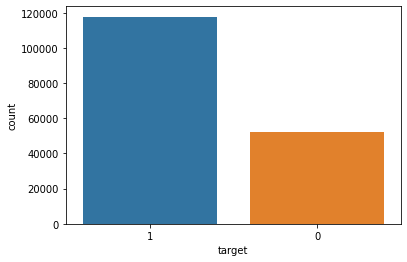

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data= df_A, order = df_A['target'].value_counts().index)
plt.show()

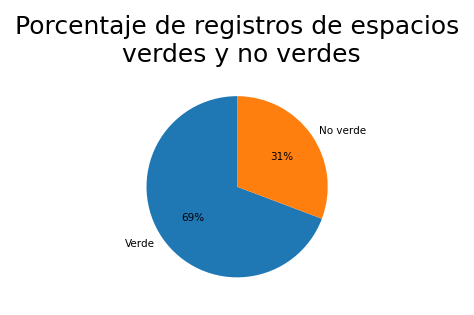

In [ ]:
verde = df_A[df_A.target == 1].shape[0]
no_verde = df_A[df_A.target == 0].shape[0]

etiquetas = ['Verde', 'No verde']

plt.figure(figsize=(2, 2), dpi=150)
plt.pie([verde, no_verde],
        labels=etiquetas,
        textprops={'fontsize': 5},
        startangle=90,
        autopct='%1.0f%%')
plt.title('Porcentaje de registros de espacios\n verdes y no verdes')
plt.show()

Como se observa el dataset para la receta A no está balanceado, por lo que incluiremos el parámetro 'stratify' en train_test_split.

In [ ]:
#para usar en la función pd_Xy_splitter
ind_ban=["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median", "B04_median", "B08_median", "B11_median"]

add= ["mes", "area_m2", "week"]

x_case_A= ind_ban + add

y_case_A=['target']

In [ ]:
XY_train_A,XY_test_A=train_test_split(df_A,test_size=0.3, stratify=df_A.target, random_state=1)
#
X_train_A,Y_train_A = pd_Xy_splitter(XY_train_A,x_case_A,y_case_A)
X_test_A,Y_test_A = pd_Xy_splitter(XY_test_A,x_case_A,y_case_A)

### Generamos el modelo RandomForest para clasificación base

In [ ]:
model_A= RandomForestClassifier(random_state=10)
model_A

RandomForestClassifier(random_state=10)

####Entrenamiento

In [ ]:
X_case_A=X_train_A; Y_case_A=Y_train_A ; Case= 'TRAIN';

model=model_A
# Fit
model.fit(X_case_A,Y_case_A.values.ravel())

RandomForestClassifier(random_state=10)

##### Métricas de entrenamiento

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       1.00      1.00      1.00     36607
       VERDE       1.00      1.00      1.00     82456

    accuracy                           1.00    119063
   macro avg       1.00      1.00      1.00    119063
weighted avg       1.00      1.00      1.00    119063





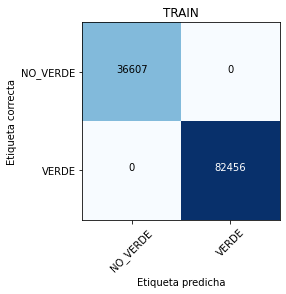

{'NO_VERDE': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 36607},
 'VERDE': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 82456},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 119063},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 119063}}

In [ ]:
print_plot_classification_report(model,X_case_A,Y_case_A,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

####Test

##### Métricas de test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       1.00      1.00      1.00     15688
       VERDE       1.00      1.00      1.00     35339

    accuracy                           1.00     51027
   macro avg       1.00      1.00      1.00     51027
weighted avg       1.00      1.00      1.00     51027





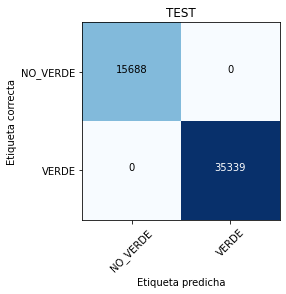

{'NO_VERDE': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 15688},
 'VERDE': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 35339},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 51027},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 51027}}

In [ ]:
X_case_test_A=X_test_A; Y_case_test_A=Y_test_A ; Case_test='TEST'

print_plot_classification_report(model,X_case_test_A,Y_case_test_A,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

Importancia de features en el modelo base

In [ ]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train_A.columns
fi["IMPORTANCE"] = model.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

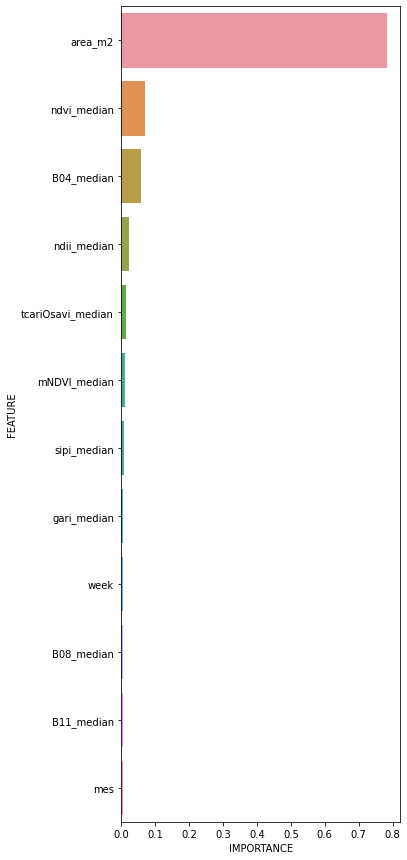

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

El gráfico anterior nos muestra que la variable area_m2 tiene aproximadamente el 80% de importancia en el modelo, sin embargo las variables ndvi_median y B04_median también proporcionan algo de peso. Decidimos quitar la variable area_m2 para evitar el sobreajuste.

#### Optimización de parámetros

Generamos un nuevo conjunto de entrenamiento y test sin tener en cuenta la variable area.

In [ ]:
ind_ban=["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median", "B04_median", "B08_median", "B11_median"]

add_no_area= ["mes", "week"]

x_case_A_1= ind_ban + add_no_area

y_case_A=['target']

In [ ]:
# XY_train_A,XY_test_A=train_test_split(df_A,test_size=0.3, stratify=df_A.target, random_state=1)
# #
X_train_A_1,Y_train_A_1 = pd_Xy_splitter(XY_train_A, x_case_A_1, y_case_A)
X_test_A_1,Y_test_A_1 = pd_Xy_splitter(XY_test_A, x_case_A_1, y_case_A)

In [ ]:
X_case_A=X_train_A_1; Y_case_A=Y_train_A_1 ; Case= 'TRAIN';

model=model_A
# Fit
model.fit(X_case_A,Y_case_A.values.ravel())

RandomForestClassifier(random_state=10)

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       1.00      1.00      1.00     36607
       VERDE       1.00      1.00      1.00     82456

    accuracy                           1.00    119063
   macro avg       1.00      1.00      1.00    119063
weighted avg       1.00      1.00      1.00    119063





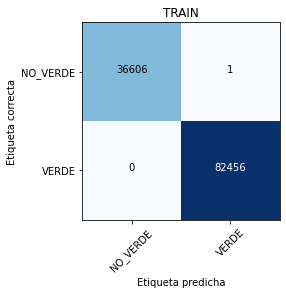

{'NO_VERDE': {'precision': 1.0,
  'recall': 0.9999726828202257,
  'f1-score': 0.9999863412235531,
  'support': 36607},
 'VERDE': {'precision': 0.9999878724668615,
  'recall': 1.0,
  'f1-score': 0.9999939361966613,
  'support': 82456},
 'accuracy': 0.9999916010851398,
 'macro avg': {'precision': 0.9999939362334307,
  'recall': 0.9999863414101129,
  'f1-score': 0.9999901387101072,
  'support': 119063},
 'weighted avg': {'precision': 0.9999916011869979,
  'recall': 0.9999916010851398,
  'f1-score': 0.999991601053245,
  'support': 119063}}

In [ ]:
print_plot_classification_report(model,X_case_A,Y_case_A,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.88      0.74      0.80     15688
       VERDE       0.89      0.96      0.92     35339

    accuracy                           0.89     51027
   macro avg       0.89      0.85      0.86     51027
weighted avg       0.89      0.89      0.89     51027





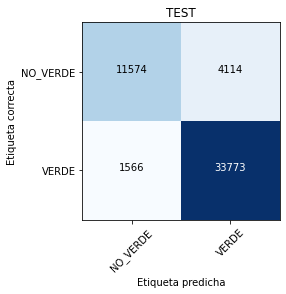

{'NO_VERDE': {'precision': 0.8808219178082192,
  'recall': 0.7377613462519123,
  'f1-score': 0.8029693353683919,
  'support': 15688},
 'VERDE': {'precision': 0.891413941457492,
  'recall': 0.9556863521887999,
  'f1-score': 0.9224319230874279,
  'support': 35339},
 'accuracy': 0.8886863817194819,
 'macro avg': {'precision': 0.8861179296328556,
  'recall': 0.8467238492203562,
  'f1-score': 0.8627006292279099,
  'support': 51027},
 'weighted avg': {'precision': 0.8881574759194476,
  'recall': 0.8886863817194819,
  'f1-score': 0.8857037384766093,
  'support': 51027}}

In [ ]:
X_case_test_A=X_test_A_1; Y_case_test_A=Y_test_A_1 ; Case_test='TEST'

print_plot_classification_report(model,X_case_test_A,Y_case_test_A,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

In [ ]:
fi_1 = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi_1["FEATURE"] = X_train_A_1.columns
fi_1["IMPORTANCE"] = model.feature_importances_
fi_1 = fi_1.sort_values("IMPORTANCE", ascending=False)

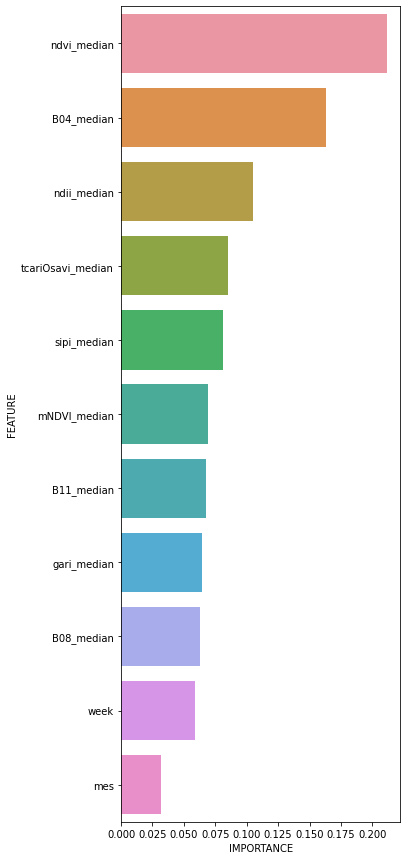

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi_1.FEATURE, x=fi_1.IMPORTANCE)
plt.show()

Optimización por medio de RandomizedSearch

In [ ]:
parameters_A = { 
    'n_estimators': range(50, 300, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range (2, 5, 1),
    'criterion' :['gini', 'entropy']
}



In [ ]:
rs_A = RandomizedSearchCV(
    estimator=model_A,
    param_distributions=parameters_A,
    scoring = 'accuracy',
    cv = 5,
    verbose=False,
    random_state = 10)



In [ ]:
rs_A.fit(X_train_A_1, Y_train_A_1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': range(50, 300, 50)},
                   random_state=10, scoring='accuracy', verbose=False)

Resultados de la optimización de hiperparámetros

In [ ]:
results_A = rs_A.cv_results_

data_rf_A=pd.DataFrame(results_A)
data_rf_A.sort_values('rank_test_score')[:6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,15.569355,0.028657,0.261593,0.002778,150,sqrt,4,gini,"{'n_estimators': 150, 'max_features': 'sqrt', ...",0.817705,0.816907,0.820812,0.819335,0.812699,0.817492,0.002749,1
3,5.244181,0.011317,0.092245,0.001896,50,sqrt,4,gini,"{'n_estimators': 50, 'max_features': 'sqrt', '...",0.816571,0.816067,0.819384,0.818033,0.813413,0.816694,0.002010,2
8,20.833585,0.008683,0.347663,0.001513,200,sqrt,4,gini,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.816487,0.814639,0.820182,0.817697,0.811944,0.816190,0.002783,3
0,14.375753,0.060083,0.177913,0.000884,100,auto,4,entropy,"{'n_estimators': 100, 'max_features': 'auto', ...",0.814009,0.814429,0.819300,0.817907,0.812909,0.815711,0.002453,4
7,22.340844,0.038079,0.316685,0.002227,200,sqrt,3,entropy,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.806618,0.803679,0.809600,0.806358,0.803334,0.805918,0.002277,5
1,8.220207,0.022919,0.160722,0.003691,100,log2,3,gini,"{'n_estimators': 100, 'max_features': 'log2', ...",0.800487,0.797548,0.803217,0.800353,0.794221,0.799165,0.003054,6


In [ ]:
data_rf_A[['param_max_depth','param_n_estimators', 'param_max_features','param_criterion','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True).head(5)

,param_max_depth,param_n_estimators,param_max_features,param_criterion,mean_test_score,std_test_score,rank_test_score
6,4,150,sqrt,gini,0.817492,0.002749,1
3,4,50,sqrt,gini,0.816694,0.002010,2
8,4,200,sqrt,gini,0.816190,0.002783,3
0,4,100,auto,entropy,0.815711,0.002453,4
7,3,200,sqrt,entropy,0.805918,0.002277,5


Extraemos el mejor modelo obtenido de la optimización

In [ ]:
best_rf_A=rs_A.best_estimator_
best_rf_A


RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                       random_state=10)

Exploramos la importancia de las variables para el mejor modelo. Vemos que las variables temporales ocupan un lugar importante en la clasificación.

In [ ]:
fi_best_A = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi_best_A["FEATURE"] = X_train_A_1.columns
fi_best_A["IMPORTANCE"] = best_rf_A.feature_importances_
fi_best_A = fi_best_A.sort_values("IMPORTANCE", ascending=False)

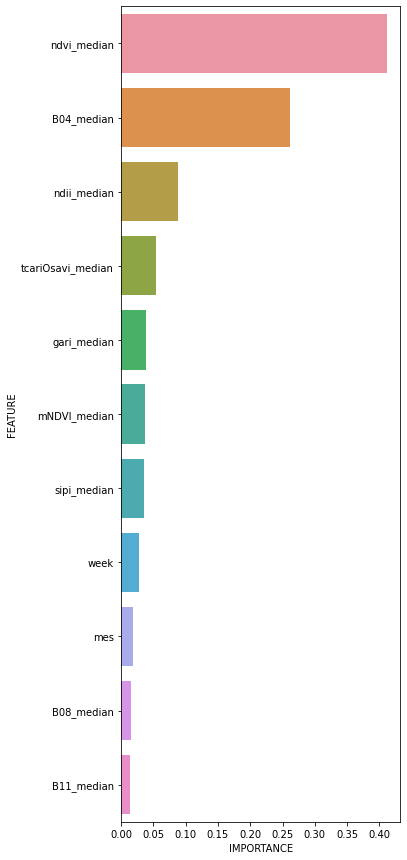

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi_best_A.FEATURE, x=fi_best_A.IMPORTANCE)
plt.show()

Metricas de train y test para el mejor modelo.

Train

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       0.85      0.49      0.62     36607
       VERDE       0.81      0.96      0.88     82456

    accuracy                           0.82    119063
   macro avg       0.83      0.73      0.75    119063
weighted avg       0.82      0.82      0.80    119063





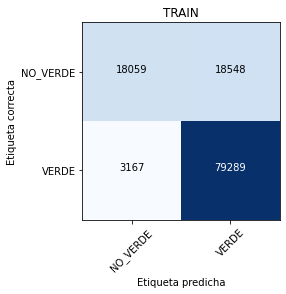

{'NO_VERDE': {'precision': 0.850796193347781,
  'recall': 0.493320949545169,
  'f1-score': 0.6245223315408158,
  'support': 36607},
 'VERDE': {'precision': 0.8104193709946135,
  'recall': 0.9615916367517221,
  'f1-score': 0.8795571652809594,
  'support': 82456},
 'accuracy': 0.8176175638107557,
 'macro avg': {'precision': 0.8306077821711972,
  'recall': 0.7274562931484455,
  'f1-score': 0.7520397484108876,
  'support': 119063},
 'weighted avg': {'precision': 0.8228335914987365,
  'recall': 0.8176175638107557,
  'f1-score': 0.8011443908781185,
  'support': 119063}}

In [ ]:
X_case_A_1=X_train_A_1; Y_case_A_1=Y_train_A_1 ; Case= 'TRAIN';

print_plot_classification_report(best_rf_A,X_case_A_1,Y_case_A_1,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

Test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.85      0.49      0.62     15688
       VERDE       0.81      0.96      0.88     35339

    accuracy                           0.82     51027
   macro avg       0.83      0.73      0.75     51027
weighted avg       0.82      0.82      0.80     51027





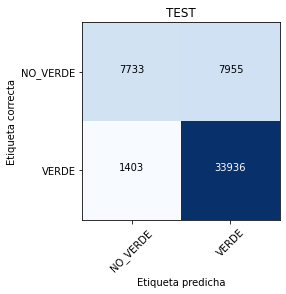

{'NO_VERDE': {'precision': 0.8464316987740805,
  'recall': 0.49292452830188677,
  'f1-score': 0.6230261037705446,
  'support': 15688},
 'VERDE': {'precision': 0.8101024086319257,
  'recall': 0.960298820000566,
  'f1-score': 0.8788294704130519,
  'support': 35339},
 'accuracy': 0.8166068943892449,
 'macro avg': {'precision': 0.8282670537030031,
  'recall': 0.7266116741512264,
  'f1-score': 0.7509277870917983,
  'support': 51027},
 'weighted avg': {'precision': 0.8212716700768494,
  'recall': 0.8166068943892449,
  'f1-score': 0.8001839843784495,
  'support': 51027}}

In [ ]:
X_case_test_A_1=X_test_A_1; Y_case_test_A_1=Y_test_A_1 ; Case_test='TEST'

print_plot_classification_report(best_rf_A, X_case_test_A_1, Y_case_test_A_1,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

## RandomForest receta B

####Split y modelo

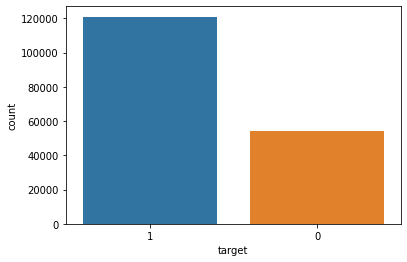

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data= df_B, order = df_B['target'].value_counts().index)
plt.show()

In [ ]:
#para usar en la función pd_Xy_splitter
ind_ban=["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median", "B04_median", "B08_median", "B11_median"]

add_b= ["mes", "week"] #sacamos la variable area_m2

x_case_B= ind_ban + add_b

y_case_B=['target']

In [ ]:
XY_train_B,XY_test_B=train_test_split(df_B,test_size=0.3, stratify=df_B.target, random_state=1)
#
X_train_B,Y_train_B = pd_Xy_splitter(XY_train_B,x_case_B,y_case_B)
X_test_B,Y_test_B = pd_Xy_splitter(XY_test_B,x_case_B,y_case_B)

In [ ]:
X_case_B=X_train_B; Y_case_B=Y_train_B ; Case= 'TRAIN';

# Fit
model.fit(X_case_B,Y_case_B.values.ravel())

RandomForestClassifier(random_state=10)

Analizamos las métricas para un modelo base RandomForest de clasificación

####Métricas de train

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       1.00      1.00      1.00     37806
       VERDE       1.00      1.00      1.00     84698

    accuracy                           1.00    122504
   macro avg       1.00      1.00      1.00    122504
weighted avg       1.00      1.00      1.00    122504





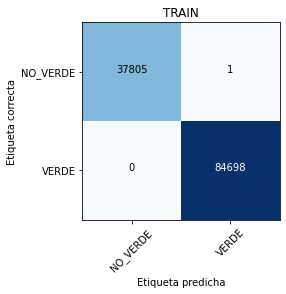

{'NO_VERDE': {'precision': 1.0,
  'recall': 0.9999735491720891,
  'f1-score': 0.9999867744111307,
  'support': 37806},
 'VERDE': {'precision': 0.9999881934851651,
  'recall': 1.0,
  'f1-score': 0.9999940967077339,
  'support': 84698},
 'accuracy': 0.9999918370012407,
 'macro avg': {'precision': 0.9999940967425825,
  'recall': 0.9999867745860446,
  'f1-score': 0.9999904355594322,
  'support': 122504},
 'weighted avg': {'precision': 0.9999918370976173,
  'recall': 0.9999918370012407,
  'f1-score': 0.9999918369713549,
  'support': 122504}}

In [ ]:
print_plot_classification_report(model,X_case_B,Y_case_B,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

####Métricas de test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.88      0.74      0.80     16203
       VERDE       0.89      0.95      0.92     36300

    accuracy                           0.89     52503
   macro avg       0.88      0.85      0.86     52503
weighted avg       0.89      0.89      0.88     52503





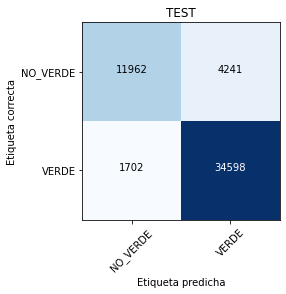

{'NO_VERDE': {'precision': 0.8754391100702577,
  'recall': 0.7382583472196507,
  'f1-score': 0.8010178457829711,
  'support': 16203},
 'VERDE': {'precision': 0.8908056335127063,
  'recall': 0.9531129476584022,
  'f1-score': 0.9209065864597611,
  'support': 36300},
 'accuracy': 0.8868064682018171,
 'macro avg': {'precision': 0.883122371791482,
  'recall': 0.8456856474390264,
  'f1-score': 0.8609622161213661,
  'support': 52503},
 'weighted avg': {'precision': 0.8860633563221076,
  'recall': 0.8868064682018171,
  'f1-score': 0.8839076099215437,
  'support': 52503}}

In [ ]:
X_case_test_B=X_test_B; Y_case_test_B=Y_test_B ; Case_test='TEST'

print_plot_classification_report(model,X_case_test_B,Y_case_test_B,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

####Optimización de hiperparámetros

Usamos RandomizedSearch de la misma forma que lo utilizamos con la receta A, sólo que cambiamos los conjuntos de entrenamiento y test.

In [ ]:
rs_B=rs_A

In [ ]:
rs_B.fit(X_train_B, Y_train_B)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': range(50, 300, 50)},
                   random_state=10, scoring='accuracy', verbose=False)

Resultados de la optimización

In [ ]:
results_B = rs_B.cv_results_

data_rf_B=pd.DataFrame(results_B)
data_rf_B[['param_max_depth','param_n_estimators', 'param_max_features','param_criterion','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True).head(5)

,param_max_depth,param_n_estimators,param_max_features,param_criterion,mean_test_score,std_test_score,rank_test_score
3,4,50,sqrt,gini,0.820545,0.002290,1
6,4,150,sqrt,gini,0.819851,0.002381,2
8,4,200,sqrt,gini,0.818985,0.002080,3
0,4,100,auto,entropy,0.818316,0.002148,4
1,3,100,log2,gini,0.808284,0.002078,5


Extraemos el mejor modelo obtenido de la optimización

In [ ]:
best_rf_B=rs_B.best_estimator_
best_rf_B

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=50,
                       random_state=10)

Exploramos la importancia de las variables para el mejor modelo. Vemos que las variables temporales ocupan un lugar importante en la clasificación.

In [ ]:
fi_best_B = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi_best_B["FEATURE"] = X_train_B.columns
fi_best_B["IMPORTANCE"] = best_rf_B.feature_importances_
fi_best_B = fi_best_B.sort_values("IMPORTANCE", ascending=False)

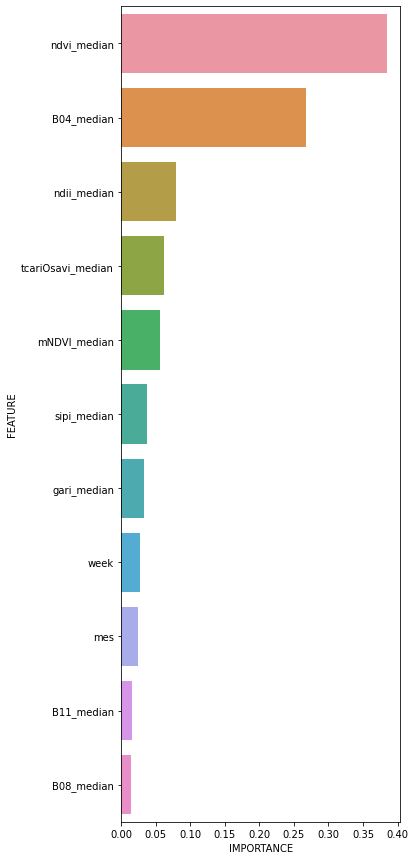

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi_best_B.FEATURE, x=fi_best_B.IMPORTANCE)
plt.show()

Métricas de train y test para el mejor modelo

Train

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       0.85      0.52      0.64     37806
       VERDE       0.82      0.96      0.88     84698

    accuracy                           0.82    122504
   macro avg       0.83      0.74      0.76    122504
weighted avg       0.83      0.82      0.81    122504





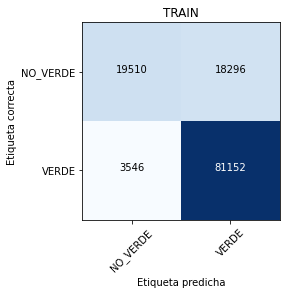

{'NO_VERDE': {'precision': 0.8462005551700208,
  'recall': 0.5160556525419245,
  'f1-score': 0.6411225395156255,
  'support': 37806},
 'VERDE': {'precision': 0.8160244549915534,
  'recall': 0.9581336040992704,
  'f1-score': 0.8813875946260035,
  'support': 84698},
 'accuracy': 0.8217037811010253,
 'macro avg': {'precision': 0.831112505080787,
  'recall': 0.7370946283205975,
  'f1-score': 0.7612550670708145,
  'support': 122504},
 'weighted avg': {'precision': 0.8253371112586724,
  'recall': 0.8217037811010253,
  'f1-score': 0.8072393164187371,
  'support': 122504}}

In [ ]:
print_plot_classification_report(best_rf_B,X_case_B,Y_case_B,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

Test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.84      0.51      0.64     16203
       VERDE       0.81      0.96      0.88     36300

    accuracy                           0.82     52503
   macro avg       0.83      0.73      0.76     52503
weighted avg       0.82      0.82      0.81     52503





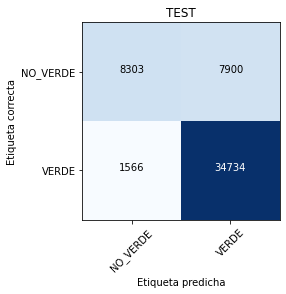

{'NO_VERDE': {'precision': 0.8413213091498633,
  'recall': 0.5124359686477813,
  'f1-score': 0.6369285056765879,
  'support': 16203},
 'VERDE': {'precision': 0.8147018811277384,
  'recall': 0.9568595041322314,
  'f1-score': 0.8800770263764665,
  'support': 36300},
 'accuracy': 0.8197055406357732,
 'macro avg': {'precision': 0.8280115951388008,
  'recall': 0.7346477363900064,
  'f1-score': 0.7585027660265271,
  'support': 52503},
 'weighted avg': {'precision': 0.8229169277392175,
  'recall': 0.8197055406357732,
  'f1-score': 0.8050387336903317,
  'support': 52503}}

In [ ]:
print_plot_classification_report(best_rf_B, X_case_test_B, Y_case_test_B,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

## RandomForest receta C

####Split y modelo

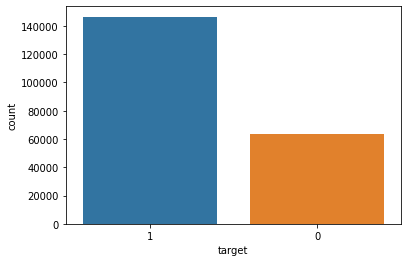

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data= df_C, order = df_C['target'].value_counts().index)
plt.show()

Como esta receta tiene en cuenta la estacionalidad vamos a incorporar las variables relacionadas a la estación del año. 

In [ ]:
#para usar en la función pd_Xy_splitter
ind_ban=["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median", "B04_median", "B08_median", "B11_median"]

add_c= ["week", "estacion_Verano", "estacion_Invierno", "estacion_Otoño", "estacion_Primavera", "año", "mes"] #quitamos la variable area_m2

x_case_C= add_c + ind_ban

y_case_C=['target']

In [ ]:
XY_train_C,XY_test_C=train_test_split(df_C,test_size=0.3, stratify=df_C.target, random_state=1)
#
X_train_C,Y_train_C = pd_Xy_splitter(XY_train_C,x_case_C,y_case_C)
X_test_C,Y_test_C = pd_Xy_splitter(XY_test_C,x_case_C,y_case_C)

In [ ]:
X_case_C=X_train_C; Y_case_C=Y_train_C ; Case= 'TRAIN';
model=model_A
# Fit
model.fit(X_case_C,Y_case_C.values.ravel())

RandomForestClassifier(random_state=10)

In [ ]:
fi_best_C = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi_best_C["FEATURE"] = X_train_C.columns
fi_best_C["IMPORTANCE"] = model.feature_importances_
fi_best_C = fi_best_C.sort_values("IMPORTANCE", ascending=False)

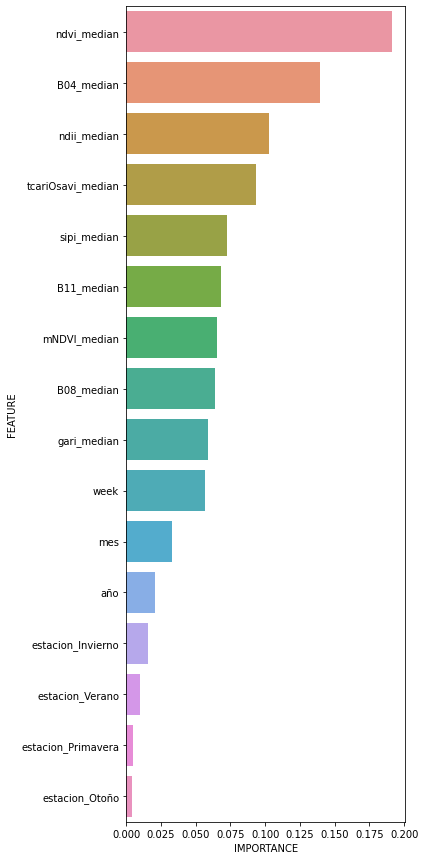

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi_best_C.FEATURE, x=fi_best_C.IMPORTANCE)
plt.show()

Analizamos las métricas para un modelo base RandomForest de clasificación

####Métricas de train

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       1.00      1.00      1.00     44475
       VERDE       1.00      1.00      1.00    102507

    accuracy                           1.00    146982
   macro avg       1.00      1.00      1.00    146982
weighted avg       1.00      1.00      1.00    146982





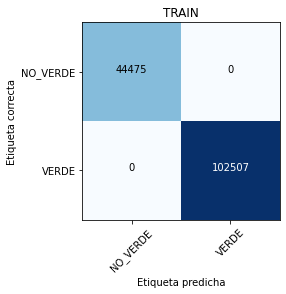

{'NO_VERDE': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 44475},
 'VERDE': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 102507},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 146982},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 146982}}

In [ ]:
print_plot_classification_report(model,X_case_C,Y_case_C,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

####Métricas de test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.89      0.72      0.79     19061
       VERDE       0.89      0.96      0.92     43932

    accuracy                           0.89     62993
   macro avg       0.89      0.84      0.86     62993
weighted avg       0.89      0.89      0.88     62993





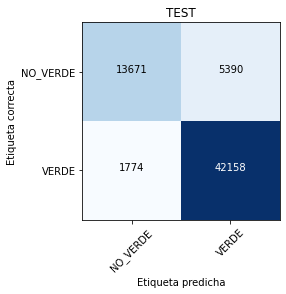

{'NO_VERDE': {'precision': 0.8851408222725802,
  'recall': 0.7172236503856041,
  'f1-score': 0.7923839332290037,
  'support': 19061},
 'VERDE': {'precision': 0.8866408681753176,
  'recall': 0.9596194118182646,
  'f1-score': 0.9216878006121557,
  'support': 43932},
 'accuracy': 0.8862730779610433,
 'macro avg': {'precision': 0.8858908452239489,
  'recall': 0.8384215311019343,
  'f1-score': 0.8570358669205798,
  'support': 62993},
 'weighted avg': {'precision': 0.8861869705207833,
  'recall': 0.8862730779610433,
  'f1-score': 0.8825618498527021,
  'support': 62993}}

In [ ]:
X_case_test_C=X_test_C; Y_case_test_C=Y_test_C ; Case_test='TEST'

print_plot_classification_report(model,X_case_test_C,Y_case_test_C,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

####Optimización de hiperparámetros

Usamos RandomizedSearch de la misma forma que lo utilizamos con la receta A y B, sólo que cambiamos los conjuntos de entrenamiento y test correspondiente a la receta C.

In [ ]:
rs_C=rs_A

In [ ]:
rs_C.fit(X_train_C, Y_train_C)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': range(50, 300, 50)},
                   random_state=10, scoring='accuracy', verbose=False)

Resultados de la optimización

In [ ]:
results_C = rs_C.cv_results_

data_rf_C=pd.DataFrame(results_C)
data_rf_C[['param_max_depth','param_n_estimators', 'param_max_features','param_criterion','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True).head(5)

,param_max_depth,param_n_estimators,param_max_features,param_criterion,mean_test_score,std_test_score,rank_test_score
8,4,200,sqrt,gini,0.829006,0.001667,1
6,4,150,sqrt,gini,0.828748,0.001747,2
0,4,100,auto,entropy,0.828040,0.001236,3
3,4,50,sqrt,gini,0.828020,0.002146,4
4,3,250,auto,gini,0.812514,0.001163,5


Extraemos el mejor modelo de la optimización

In [ ]:
best_rf_C=rs_C.best_estimator_
best_rf_C

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=200,
                       random_state=10)

Exploramos la importancia de las variables para el mejor modelo. Vemos que las variables temporales ocupan un lugar importante en la clasificación.

In [ ]:
fi_best_C = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi_best_C["FEATURE"] = X_train_C.columns
fi_best_C["IMPORTANCE"] = best_rf_C.feature_importances_
fi_best_C = fi_best_C.sort_values("IMPORTANCE", ascending=False)

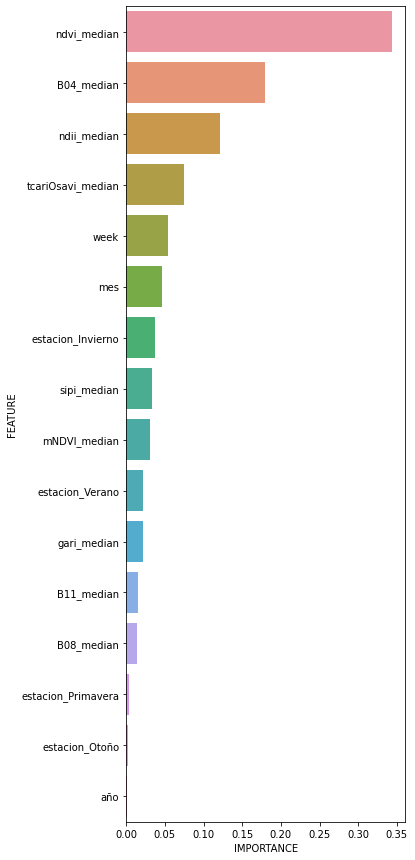

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi_best_C.FEATURE, x=fi_best_C.IMPORTANCE)
plt.show()

Métricas de entrenamiento y test para el mejor modelo.

Train

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       0.87      0.52      0.65     44475
       VERDE       0.82      0.96      0.89    102507

    accuracy                           0.83    146982
   macro avg       0.84      0.74      0.77    146982
weighted avg       0.83      0.83      0.81    146982





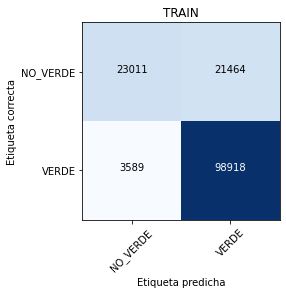

{'NO_VERDE': {'precision': 0.8650751879699248,
  'recall': 0.5173917931422147,
  'f1-score': 0.6475131902919451,
  'support': 44475},
 'VERDE': {'precision': 0.8217009187420046,
  'recall': 0.9649877569336728,
  'f1-score': 0.8875987599208573,
  'support': 102507},
 'accuracy': 0.8295505572110871,
 'macro avg': {'precision': 0.8433880533559647,
  'recall': 0.7411897750379437,
  'f1-score': 0.7675559751064012,
  'support': 146982},
 'weighted avg': {'precision': 0.8348254552424724,
  'recall': 0.8295505572110871,
  'f1-score': 0.814951730289706,
  'support': 146982}}

In [ ]:
print_plot_classification_report(best_rf_C,X_case_C,Y_case_C,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

Test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.86      0.51      0.64     19061
       VERDE       0.82      0.96      0.89     43932

    accuracy                           0.83     62993
   macro avg       0.84      0.74      0.76     62993
weighted avg       0.83      0.83      0.81     62993





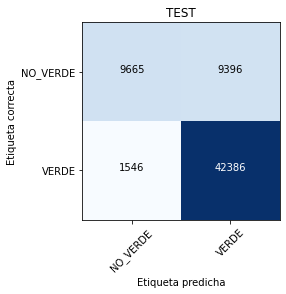

{'NO_VERDE': {'precision': 0.8620997234858621,
  'recall': 0.5070562929541996,
  'f1-score': 0.638543868921776,
  'support': 19061},
 'VERDE': {'precision': 0.8185469854389557,
  'recall': 0.964809250660111,
  'f1-score': 0.8856802557619574,
  'support': 43932},
 'accuracy': 0.8262981601130285,
 'macro avg': {'precision': 0.8403233544624089,
  'recall': 0.7359327718071553,
  'f1-score': 0.7621120623418667,
  'support': 62993},
 'weighted avg': {'precision': 0.8317255725821634,
  'recall': 0.8262981601130285,
  'f1-score': 0.8108994599662229,
  'support': 62993}}

In [ ]:
print_plot_classification_report(best_rf_C, X_case_test_C, Y_case_test_C,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

##RandomForest receta D

####Split y modelo

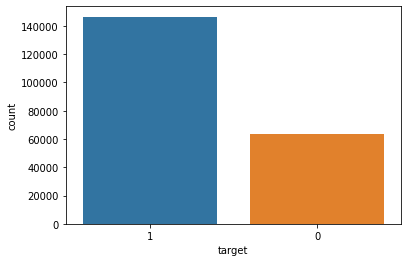

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data= df_D, order = df_D['target'].value_counts().index)
plt.show()

In [ ]:
ind_ban=["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median", "B04_median", "B08_median", "B11_median"]

add_d= ["week", "estacion_Verano", "estacion_Invierno", "estacion_Otoño", "estacion_Primavera"]

x_case_D= ind_ban + add_d

y_case_D=['target']

In [ ]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()

In [ ]:
df_D_escal1=df_C.copy()
df_D_escal1=df_D_escal1.drop(labels='año', axis=1)

In [ ]:
#df_D_escal=df_D.copy()

In [ ]:
df_D_escal1.loc[:,x_case_D]=transformer.fit_transform(df_D_escal1[x_case_D])

In [ ]:
XY_train_D,XY_test_D=train_test_split(df_D_escal1,test_size=0.3, stratify=df_D.target, random_state=1)
#
X_train_D,Y_train_D = pd_Xy_splitter(XY_train_D,x_case_D,y_case_D)
X_test_D,Y_test_D = pd_Xy_splitter(XY_test_D,x_case_D,y_case_D)

In [ ]:
X_case_D=X_train_D; Y_case_D=Y_train_D ; Case= 'TRAIN';

# Fit
model.fit(X_case_D,Y_case_D.values.ravel())

RandomForestClassifier(random_state=10)

Analizamos las métricas para un modelo base RandomForest de clasificación

####Métricas de train

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       1.00      1.00      1.00     44475
       VERDE       1.00      1.00      1.00    102507

    accuracy                           1.00    146982
   macro avg       1.00      1.00      1.00    146982
weighted avg       1.00      1.00      1.00    146982





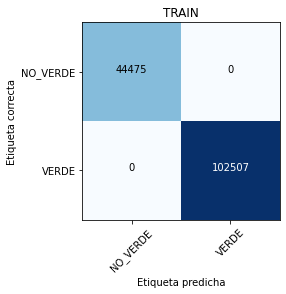

{'NO_VERDE': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 44475},
 'VERDE': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 102507},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 146982},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 146982}}

In [ ]:
print_plot_classification_report(model,X_case_D,Y_case_D,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

####Métricas de test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.88      0.71      0.79     19061
       VERDE       0.89      0.96      0.92     43932

    accuracy                           0.88     62993
   macro avg       0.88      0.84      0.85     62993
weighted avg       0.88      0.88      0.88     62993





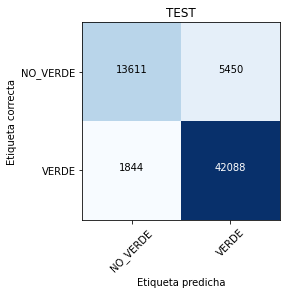

{'NO_VERDE': {'precision': 0.8806858621805241,
  'recall': 0.7140758617071508,
  'f1-score': 0.7886777146830457,
  'support': 19061},
 'VERDE': {'precision': 0.8853548739955404,
  'recall': 0.9580260402440135,
  'f1-score': 0.9202580080900841,
  'support': 43932},
 'accuracy': 0.8842093565951772,
 'macro avg': {'precision': 0.8830203680880322,
  'recall': 0.8360509509755821,
  'f1-score': 0.8544678613865648,
  'support': 62993},
 'weighted avg': {'precision': 0.883942081555015,
  'recall': 0.8842093565951772,
  'f1-score': 0.8804432354545284,
  'support': 62993}}

In [ ]:
X_case_test_D=X_test_D; Y_case_test_D=Y_test_D ; Case_test='TEST'

print_plot_classification_report(model,X_case_test_D,Y_case_test_D,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

####Optimización de hiperparámetros

Usamos RandomizedSearch de la misma forma que lo utilizamos para el resto de las recetas, sólo que cambiamos los conjuntos de entrenamiento y test correspondiente a la receta D.

In [ ]:
parameters_D = { 
    'n_estimators': range(50, 300, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range (2, 10, 1),
    'criterion' :['gini', 'entropy']
}

In [ ]:
rs_D = RandomizedSearchCV(
    estimator=model_A,
    param_distributions=parameters_A,
    scoring = 'accuracy',
    cv = 5,
    verbose=False,
    random_state = 10)

In [ ]:
rs_D.fit(X_train_D, Y_train_D)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': range(50, 300, 50)},
                   random_state=10, scoring='accuracy', verbose=False)

Resultados de la optimización

In [ ]:
results_D = rs_D.cv_results_

data_rf_D=pd.DataFrame(results_D)
data_rf_D[['param_max_depth','param_n_estimators', 'param_max_features','param_criterion','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True).head(5)

,param_max_depth,param_n_estimators,param_max_features,param_criterion,mean_test_score,std_test_score,rank_test_score
6,4,150,sqrt,gini,0.828625,0.000918,1
8,4,200,sqrt,gini,0.828081,0.000976,2
3,4,50,sqrt,gini,0.827578,0.001128,3
0,4,100,auto,entropy,0.826802,0.001323,4
4,3,250,auto,gini,0.815460,0.001903,5


Extraemos el mejor modelo de la optimización

In [ ]:
best_rf_D=rs_D.best_estimator_
best_rf_D

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                       random_state=10)

Exploramos la importancia de las variables para el mejor modelo. Vemos que las variables temporales ocupan un lugar importante en la clasificación.

In [ ]:
fi_best_D = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi_best_D["FEATURE"] = X_train_D.columns
fi_best_D["IMPORTANCE"] = best_rf_D.feature_importances_
fi_best_D = fi_best_D.sort_values("IMPORTANCE", ascending=False)

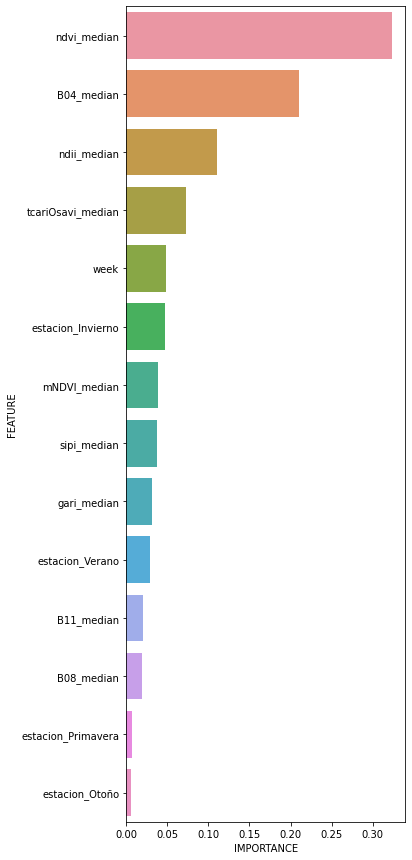

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi_best_D.FEATURE, x=fi_best_D.IMPORTANCE)
plt.show()

Métricas de entrenamiento y test para el mejor modelo

Train

TRAIN
Reporte de clasificación  (sobre conjunto TRAIN):

              precision    recall  f1-score   support

    NO_VERDE       0.86      0.52      0.65     44475
       VERDE       0.82      0.96      0.89    102507

    accuracy                           0.83    146982
   macro avg       0.84      0.74      0.77    146982
weighted avg       0.83      0.83      0.82    146982





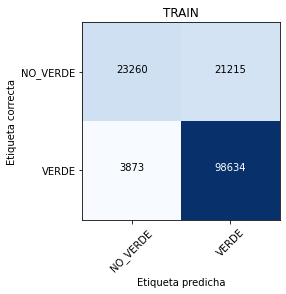

{'NO_VERDE': {'precision': 0.8572586886816791,
  'recall': 0.5229904440697021,
  'f1-score': 0.6496480840129595,
  'support': 44475},
 'VERDE': {'precision': 0.8229855902010029,
  'recall': 0.9622172144341362,
  'f1-score': 0.8871719225026534,
  'support': 102507},
 'accuracy': 0.8293124328149025,
 'macro avg': {'precision': 0.840122139441341,
  'recall': 0.7426038292519191,
  'f1-score': 0.7684100032578065,
  'support': 146982},
 'weighted avg': {'precision': 0.8333562209920391,
  'recall': 0.8293124328149025,
  'f1-score': 0.8153000421579232,
  'support': 146982}}

In [ ]:
print_plot_classification_report(best_rf_D,X_case_D,Y_case_D,Case,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

Test

TEST
Reporte de clasificación  (sobre conjunto TEST):

              precision    recall  f1-score   support

    NO_VERDE       0.85      0.51      0.64     19061
       VERDE       0.82      0.96      0.89     43932

    accuracy                           0.83     62993
   macro avg       0.84      0.74      0.76     62993
weighted avg       0.83      0.83      0.81     62993





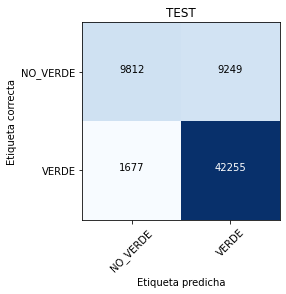

{'NO_VERDE': {'precision': 0.8540342936722082,
  'recall': 0.5147683752164105,
  'f1-score': 0.6423567921440262,
  'support': 19061},
 'VERDE': {'precision': 0.8204217148182665,
  'recall': 0.9618273695711554,
  'f1-score': 0.8855149000377217,
  'support': 43932},
 'accuracy': 0.8265521565888273,
 'macro avg': {'precision': 0.8372280042452374,
  'recall': 0.738297872393783,
  'f1-score': 0.763935846090874,
  'support': 62993},
 'weighted avg': {'precision': 0.8305925173762488,
  'recall': 0.8265521565888273,
  'f1-score': 0.8119378883925908,
  'support': 62993}}

In [ ]:
print_plot_classification_report(best_rf_D, X_case_test_D, Y_case_test_D,Case_test,plotFlag=True,classes_list=['NO_VERDE','VERDE'])

##Resumen

In [ ]:
print('Hiperparámetros mejor modelo Receta A: {}'.format(best_rf_A))
print('Hiperparámetros mejor modelo Receta B: {}'.format(best_rf_B))
print('Hiperparámetros mejor modelo Receta C: {}'.format(best_rf_C))
print('Hiperparámetros mejor modelo Receta D: {}'.format(best_rf_D))

Hiperparámetros mejor modelo Receta A: RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                       random_state=10)
Hiperparámetros mejor modelo Receta B: RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=50,
                       random_state=10)
Hiperparámetros mejor modelo Receta C: RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=200,
                       random_state=10)
Hiperparámetros mejor modelo Receta D: RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                       random_state=10)


Espacios verdes

In [ ]:
best_rf_A.fit(X_train_A_1, Y_train_A_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                       random_state=10)

In [ ]:
best_rf_B.fit(X_train_B, Y_train_B)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=50,
                       random_state=10)

In [ ]:
best_rf_C.fit(X_train_C, Y_train_C)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=200,
                       random_state=10)

In [ ]:
best_rf_D.fit(X_train_D, Y_train_D)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                       random_state=10)

In [ ]:
y_pred_rf_A = best_rf_A.predict(X_test_A_1)
y_pred_rf_B = best_rf_B.predict(X_test_B)
y_pred_rf_C = best_rf_C.predict(X_test_C)
y_pred_rf_D = best_rf_D.predict(X_test_D)

In [ ]:
acc_test_a = accuracy_score(Y_test_A_1,y_pred_rf_A)
acc_test_b = accuracy_score(Y_test_B,y_pred_rf_B)
acc_test_c = accuracy_score(Y_test_C,y_pred_rf_C)
acc_test_d = accuracy_score(Y_test_D,y_pred_rf_D)

In [ ]:
recall_test_a = recall_score(Y_test_A_1,y_pred_rf_A)
recall_test_b = recall_score(Y_test_B,y_pred_rf_B)
recall_test_c = recall_score(Y_test_C,y_pred_rf_C)
recall_test_d = recall_score(Y_test_D,y_pred_rf_D)

In [ ]:
prec_test_a = precision_score(Y_test_A_1,y_pred_rf_A)
prec_test_b = precision_score(Y_test_B,y_pred_rf_B)
prec_test_c = precision_score(Y_test_C,y_pred_rf_C)
prec_test_d = precision_score(Y_test_D,y_pred_rf_D)

In [ ]:
print('Resumen de métricas para los modelos RandomForestClassifier\n----------------------------------------\
---------------------\nRecall y precision para espacios verdes')
filas=['Receta A','Receta B', 'Receta C','Receta D']
columnas= ['recall', 'precision', 'accuracy']
datos= [[recall_test_a, prec_test_a, acc_test_a],[recall_test_b, prec_test_b, acc_test_b], 
        [recall_test_c, prec_test_c, acc_test_c], [recall_test_d, prec_test_d, acc_test_d]]
resumen_metricas_test = pd.DataFrame(datos, columns=columnas, index=filas)
resumen_metricas_test

Resumen de métricas para los modelos RandomForestClassifier
-------------------------------------------------------------
Recall y precision para espacios verdes


,recall,precision,accuracy
Receta A,0.960299,0.810102,0.816607
Receta B,0.956860,0.814702,0.819706
Receta C,0.964809,0.818547,0.826298
Receta D,0.961827,0.820422,0.826552


No verdes

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
precision_A, recall_A, fscore_A, support_A = score(Y_test_A_1,y_pred_rf_A)
precision_B, recall_B, fscore_B, support_B = score(Y_test_B,y_pred_rf_B)
precision_C, recall_C, fscore_C, support_C = score(Y_test_C,y_pred_rf_C)
precision_D, recall_D, fscore_D, support_D = score(Y_test_D,y_pred_rf_D)

In [ ]:
print('Resumen de métricas para los modelos RandomForestClassifier\n----------------------------------------\
---------------------\nRecall y precision para espacios NO verdes')
filas=['Receta A','Receta B', 'Receta C','Receta D']
columnas= ['recall', 'precision', 'accuracy']
datos= [[recall_A[0], precision_A[0], acc_test_a],[recall_B[0], precision_B[0], acc_test_b], 
        [recall_C[0], precision_C[0], acc_test_c], [recall_D[0], precision_D[0], acc_test_d]]
resumen_metricas_test_no_verde = pd.DataFrame(datos, columns=columnas, index=filas)
resumen_metricas_test_no_verde

Resumen de métricas para los modelos RandomForestClassifier
-------------------------------------------------------------
Recall y precision para espacios NO verdes


,recall,precision,accuracy
Receta A,0.492925,0.846432,0.816607
Receta B,0.512436,0.841321,0.819706
Receta C,0.507056,0.862100,0.826298
Receta D,0.514768,0.854034,0.826552
